### Persiapan Data

#### 01. Import Library

In [36]:
# EDA
import pandas as pd
import numpy as np

In [37]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Text Cleaning
import neattext.functions as nfx

In [39]:
# Machine Learning
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
from textblob import TextBlob as tb

#### 02. Load Data

In [41]:
# Membaca Dataset Berisi
dataset = pd.read_csv("Dataset Babak Penyisihan.csv")
dataset

,label,tweet
0,fear,Lebih menyeramkan kalo punya grup WA keluarga ...
1,joy,"Hepibesdey canteeeekk [USERNAME] panjang umur,..."
2,joy,Jumat lalu nonton inih! Selain tertarik settin...
3,joy,Nyante dulu.. Sruput kopi biar tambah bijak...
4,love,Happy annyversarry yg pertama kalinya .. Trsra...
...,...,...
5148,NaN,Aku termasuk orang yang tidak habis pikir deng...
5149,NaN,"Melawan sibuk Selasamu, jangan patah semangat ..."
5150,NaN,Momen di mana kamu merasa begitu mendalam terh...
5151,NaN,Tapi tentunya secara ini Bekasi ada hal-hal yg...


In [42]:
# Membuat Dataset Berisi dan Prediksi Terpisah
dataset_berisi = dataset.dropna(how = "any").reset_index(drop = True)
dataset_prediksi = dataset[dataset.isnull().any(axis = 1)].reset_index(drop = True)

#### 03. Data Cleaning

In [54]:
# Data Cleaning Column "tweet" dari dataset_prediksi
dataset_prediksi.dropna(subset = ["tweet"], inplace = True)
dataset_prediksi.reset_index(drop=True, inplace=True)

# Stopwords (Menghapus Kata Tidak Penting, seperti a, the, dll)
dataset_prediksi["teks_bersih"] = dataset_prediksi["tweet"].apply(nfx.remove_stopwords)

# Menghapus Kata [USERNAME]
dataset_prediksi["teks_bersih"] = dataset_prediksi['teks_bersih'].str.replace(r"\[USERNAME]", "")

# Menghapus koma, titik, dan lain lain
dataset_prediksi["teks_bersih"] = dataset_prediksi["teks_bersih"].apply(nfx.remove_punctuations)
dataset_prediksi

C:\Users\Reihan\AppData\Local\Temp/ipykernel_18500/3665882694.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_prediksi["teks_bersih"] = dataset_prediksi['teks_bersih'].str.replace(r"\[USERNAME]", "")


,label,tweet,teks_bersih
0,NaN,Saya taKan raguKan besarNya kasih sayang Tuhan...,Saya taKan raguKan besarNya kasih sayang Tuhan...
1,NaN,Cc in ke cebong2 dungu... Maksd hati pengen ca...,Cc ke cebong2 dungu Maksd hati pengen cari kes...
2,NaN,"Nah, yg keterlaluan adl kalo ada pjbt eselon y...",Nah yg keterlaluan adl kalo ada pjbt eselon yg...
3,NaN,Melody masih membatasi diri ala member ya? Yan...,Melody masih membatasi diri ala member ya Yang...
4,NaN,Rasa amarah ini membuatku merasa seperti aku a...,Rasa amarah ini membuatku merasa seperti aku a...
...,...,...,...
995,NaN,Aku termasuk orang yang tidak habis pikir deng...,Aku termasuk orang yang tidak habis pikir deng...
996,NaN,"Melawan sibuk Selasamu, jangan patah semangat ...",Melawan sibuk Selasamu jangan patah semangat yah
997,NaN,Momen di mana kamu merasa begitu mendalam terh...,Momen di mana kamu merasa begitu mendalam terh...
998,NaN,Tapi tentunya secara ini Bekasi ada hal-hal yg...,Tapi tentunya secara ini Bekasi ada halhal yg ...


In [53]:
# Data Cleaning Column "tweet" dari dataset_berisi
# Stopwords (Menghapus Kata Tidak Penting, seperti a, the, dll)
dataset_berisi["teks_bersih"] = dataset_berisi["tweet"].apply(nfx.remove_stopwords)

# Menghapus Kata [USERNAME]
dataset_berisi["teks_bersih"] = dataset_berisi['teks_bersih'].str.replace(r"\[USERNAME]", "")

# Menghapus koma, titik, dan lain lain
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_punctuations)

dataset_berisi


C:\Users\Reihan\AppData\Local\Temp/ipykernel_18500/475261461.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_berisi["teks_bersih"] = dataset_berisi['teks_bersih'].str.replace(r"\[USERNAME]", "")


,label,tweet,teks_bersih
0,fear,Lebih menyeramkan kalo punya grup WA keluarga ...,Lebih menyeramkan kalo punya grup WA keluarga ...
1,joy,"Hepibesdey canteeeekk [USERNAME] panjang umur,...",Hepibesdey canteeeekk panjang umur jadi priba...
2,joy,Jumat lalu nonton inih! Selain tertarik settin...,Jumat lalu nonton inih Selain tertarik setting...
3,joy,Nyante dulu.. Sruput kopi biar tambah bijak...,Nyante dulu Sruput kopi biar tambah bijak
4,love,Happy annyversarry yg pertama kalinya .. Trsra...,Happy annyversarry yg pertama kalinya Trsrah ...
...,...,...,...
4146,anger,sini berobat sama saya ini ngantri dokter saja...,sini berobat sama saya ini ngantri dokter saja...
4147,joy,Selamat pagi generasi Tik Tok yang kadang kepa...,Selamat pagi generasi Tik Tok yang kadang kepa...
4148,love,"Salah satu sahabat terbaik! Teman, kakak, insp...",Salah satu sahabat terbaik Teman kakak inspira...
4149,anger,[USERNAME] Gila kok ada ya perempuan pikiranny...,Gila kok ada ya perempuan pikirannya malah ny...


### Pemrosesan Data

In [45]:
#Banyak label emoticon
dataset_berisi["label"].value_counts()

sadness    1122
joy        1002
anger       875
fear        654
love        498
Name: label, dtype: int64

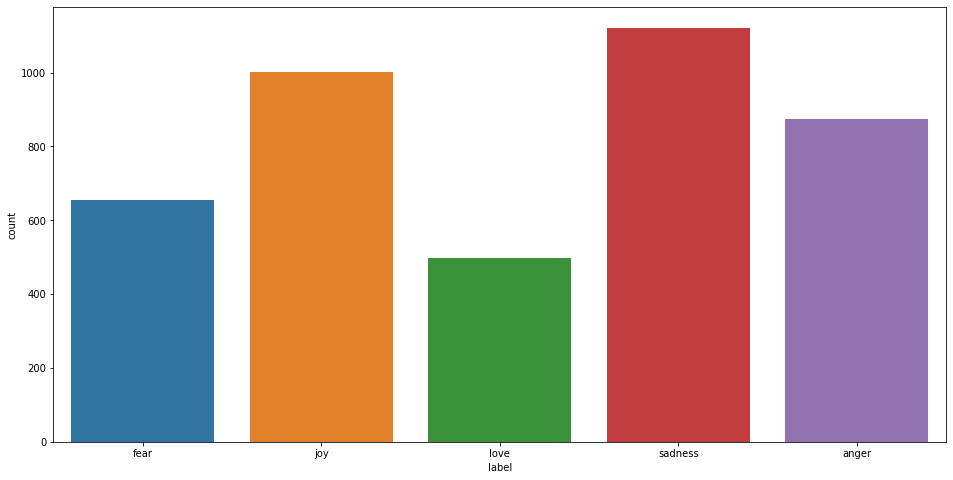

In [46]:
#Grafik bar dari banyaknya label emoticon
plt.figure(figsize=(16,8))
sns.countplot(x="label", data=dataset_berisi)
plt.show()

In [47]:
# Analisis sentimen
def sentimen(text):
    blob = tb(text)
    sentimen = blob.sentiment.polarity
    if sentimen > 0:
        return "Positif"
    elif sentimen < 0:
        return "Negatif"
    else:
        return "Netral"

In [48]:
# Contoh dari sentimen
sentimen("Saya cinta dengan koding")

'Positif'

In [49]:
dataset_berisi["sentimen"] = dataset_berisi["teks_bersih"].apply(sentimen)

KeyboardInterrupt: 

### Machine Learning